# 1.Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.

importing various libraries to analyse the data


In [351]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


loading the dataset


In [352]:
data = pd.read_csv('C:/Users/asus/Desktop/data/all_data_copy.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


summery of columns of data

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


as we can see there are 6 variables in data and dtype of all variables is 'object'
but couple of variables must be have dtype of numeric which we will modify ahead

# 2.Prepare the data frame for further analysis. Clean it, mold it in any manner you see fit.

checking the missing values

In [354]:
data.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [355]:
data[data.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
372026,NaN,NaN,NaN,NaN,NaN,NaN
372288,NaN,NaN,NaN,NaN,NaN,NaN
372892,NaN,NaN,NaN,NaN,NaN,NaN
373398,NaN,NaN,NaN,NaN,NaN,NaN


as we can see there are null values data in dataset, whole row has null values so droping these null value would nott be affecting dataset

In [356]:
# dropping null values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 19.9+ MB


Note- as we can see variable 'Quantity Ordered', 'price each' both have numeric data and 'order date' have datetime data in dataset so it needs to be change there datatype.

In [357]:
# converting variable's datatype 
data['Order ID'] = pd.to_numeric(data['Order ID'], errors="coerce")
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'], errors="coerce")
data['Price Each'] = pd.to_numeric(data['Price Each'], errors="coerce")
data['Order Date'] = pd.to_datetime(data['Order Date'], errors="coerce")

agaian checking data information

In [358]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          371900 non-null  float64       
 1   Product           372610 non-null  object        
 2   Quantity Ordered  371900 non-null  float64       
 3   Price Each        371900 non-null  float64       
 4   Order Date        371900 non-null  datetime64[ns]
 5   Purchase Address  372610 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 19.9+ MB


from above information it is seen that there are few missing values in the variables we have changed the datatype 
so these also need to be handled.

In [359]:
# checking missing values of dataset again
data.isnull().sum()


Order ID            710
Product               0
Quantity Ordered    710
Price Each          710
Order Date          710
Purchase Address      0
dtype: int64

In [360]:
data = data.dropna()
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [361]:
data.duplicated().sum()

186214

note- there are 186214 element in data which are duplicate,it needs to be dropped because it will manipulate the dataset analysis by counting the samee data twice or whatever.

In [362]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  float64       
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.9+ MB


now for little more clearity the brief is duplicates value of whole row is not useful it is nothing but only the repeated same enty.but if only if in a single column element is repeating we can not say it is not useful,it might be same thing is done or choose by different samples(people).
to check it we will find duplicates in only one column

In [363]:
data['Order ID'].duplicated().sum()

7249

it is only to understand, that 'Order ID' still has 7249.it means that same order id is used for buying different product

In [364]:
#again taking info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  float64       
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.9+ MB


Note- now our data is cleaned. there are 185686 entries are there in this dataset to observe after cleaning. lets proceed for that.

I am adding some column in this dataset as per the requirement of question.
data of city,month and hour

In [365]:
# splitting column 'order date' into  date,time,month year 
data['Date'] = pd.to_datetime(data['Order Date']).dt.date

data['Month'] = pd.to_datetime(data['Order Date']).dt.month
data['hour'] = pd.to_datetime(data['Order Date']).dt.hour
data['Year'] = pd.to_datetime(data['Order Date']).dt.year
data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,hour,Year
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,1,21,2019
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,1,14,2019
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,1,13,2019
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,1,20,2019
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,1,11,2019


In [366]:
#splitting city from purchase address and adding to dataset 
data['City'] = data['Purchase Address'].str.split(',').str[1]
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,hour,Year,City
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,1,21,2019,Boston
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,1,14,2019,Portland
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,1,13,2019,San Francisco
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,1,20,2019,Los Angeles
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,1,11,2019,Austin
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019-12-11,12,20,2019,San Francisco
186846,319667.0,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019-12-01,12,12,2019,Los Angeles
186847,319668.0,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019-12-09,12,6,2019,Seattle
186848,319669.0,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019-12-03,12,10,2019,Dallas


# 3.Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset wherever modifications are made.


In [367]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,hour,Year,City
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,1,21,2019,Boston
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,1,14,2019,Portland
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,1,13,2019,San Francisco
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,1,20,2019,Los Angeles
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,1,11,2019,Austin
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019-12-11,12,20,2019,San Francisco
186846,319667.0,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019-12-01,12,12,2019,Los Angeles
186847,319668.0,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019-12-09,12,6,2019,Seattle
186848,319669.0,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019-12-03,12,10,2019,Dallas


In [368]:
data.describe()

,Order ID,Quantity Ordered,Price Each,Month,hour,Year
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255,7.058653,14.412934,2019.000183
std,51511.717183,0.443069,332.843838,3.502932,5.423329,0.013530
min,141234.000000,1.000000,2.990000,1.000000,0.000000,2019.000000
25%,185833.250000,1.000000,11.950000,4.000000,11.000000,2019.000000
50%,230354.500000,1.000000,14.950000,7.000000,15.000000,2019.000000
75%,275028.750000,1.000000,150.000000,10.000000,19.000000,2019.000000
max,319670.000000,9.000000,1700.000000,12.000000,23.000000,2020.000000


Summery- this dataset above is cleaned and molded as per requrement. i have removed duplicates and missing value which brouht down the size of dataset to analyse.also converted datatypes of few variable.
         this dataset is better to provide observation or prediction than previously provided dataset. i have added few new coloumns as per requirement of observation like 'city','Hour','Month'.

In [369]:
data.corr()

,Order ID,Quantity Ordered,Price Each,Month,hour,Year
Order ID,1.000000,0.000739,-0.002854,0.993061,0.001232,0.020146
Quantity Ordered,0.000739,1.000000,-0.148422,0.000831,-0.002211,0.002484
Price Each,-0.002854,-0.148422,1.000000,-0.003364,0.001736,0.002666
Month,0.993061,0.000831,-0.003364,1.000000,0.001786,-0.023406
hour,0.001232,-0.002211,0.001736,0.001786,1.000000,-0.032148
Year,0.020146,0.002484,0.002666,-0.023406,-0.032148,1.000000


# 4.What is the distribution of sales among different cities in different months?
a).Which city had the highest sales overall?

In [370]:

# to get sale observation, need to get add sale column in dataset 
data['sale'] = data['Quantity Ordered']*data['Price Each']
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,hour,Year,City,sale
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,1,21,2019,Boston,700.00
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,1,14,2019,Portland,14.95
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,1,13,2019,San Francisco,23.98
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,1,20,2019,Los Angeles,149.99
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,1,11,2019,Austin,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019-12-11,12,20,2019,San Francisco,14.95
186846,319667.0,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019-12-01,12,12,2019,Los Angeles,7.68
186847,319668.0,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019-12-09,12,6,2019,Seattle,400.00
186848,319669.0,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019-12-03,12,10,2019,Dallas,11.99


Sale variable added in dataset by multiplying 'ordered quantity' and 'price each'.

In [371]:
# aggregate sale by city
data.groupby('City')['sale'].sum().sort_values()

City
 Austin           1.818044e+06
 Portland         2.319332e+06
 Seattle          2.745046e+06
 Dallas           2.765374e+06
 Atlanta          2.794199e+06
 Boston           3.658628e+06
 New York City    4.661867e+06
 Los Angeles      5.448304e+06
 San Francisco    8.254744e+06
Name: sale, dtype: float64

It is clearly showing that aggregate highest sales in cities is in san francisco.


<IPython.core.display.Javascript object>


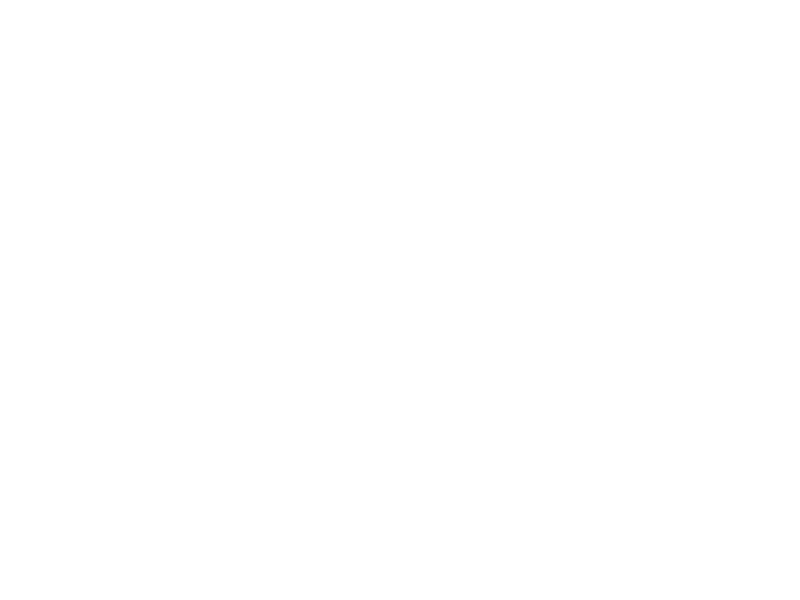

In [372]:
# visualization of output in graph
%matplotlib notebook
data.groupby('City').sale.sum().plot.barh()
plt.show()

in above graph visualisation it is clearly visible that san francisco is the biggest market for electronic gadgets and appliances

b).Which Month had the highest amount of sales overall?

In [373]:
# aggregate sale by month
data.groupby('Month')['sale'].sum().sort_values(ascending = False)

Month
12    4.608296e+06
10    3.734778e+06
4     3.389218e+06
11    3.197875e+06
5     3.150616e+06
3     2.804973e+06
7     2.646461e+06
6     2.576280e+06
8     2.241083e+06
2     2.200078e+06
9     2.094466e+06
1     1.821413e+06
Name: sale, dtype: float64

we can see that december month has the highest sale from above output,althogh december is month of festivals like christmas and new year
so product bought for gift must be high in this month of the year

<IPython.core.display.Javascript object>


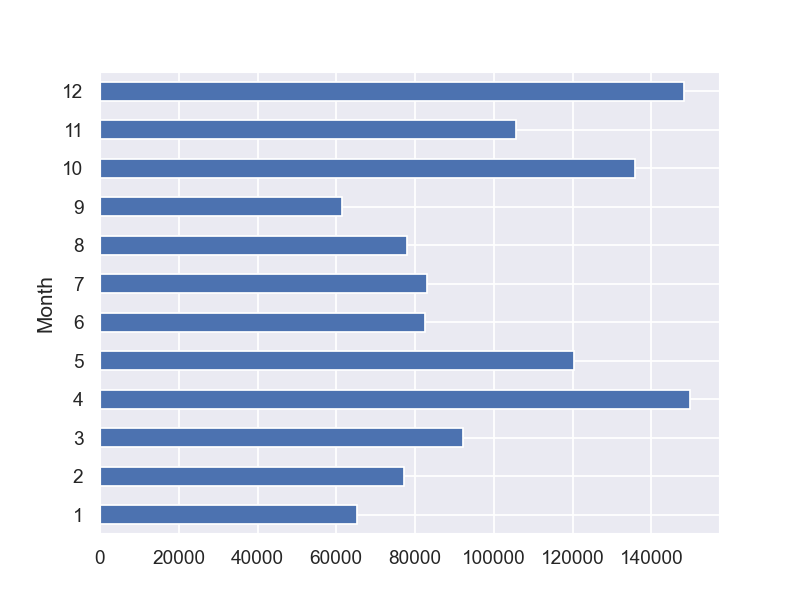

In [393]:
# graph visualisation of above output
%matplotlib notebook
data.groupby('Month').sale.sum().plot.barh()
plt.show()

this graph is clearly suggesting that december is the month of highest sale.

c).Most bought products per city?

In [375]:
# checking prdouct count city wise
df = data.groupby(['City','Product'],as_index=False)['Quantity Ordered'].count().sort_values(by ='Quantity Ordered' )
df

,City,Product,Quantity Ordered
30,Austin,LG Washing Machine,26
125,Portland,LG Washing Machine,37
124,Portland,LG Dryer,37
67,Dallas,LG Dryer,44
68,Dallas,LG Washing Machine,51
...,...,...,...
150,San Francisco,Wired Headphones,4582
137,San Francisco,AA Batteries (4-pack),4897
138,San Francisco,AAA Batteries (4-pack),4928
145,San Francisco,Lightning Charging Cable,5157


In [376]:
# ordered quantity is in ascending order maximum product at last 
#so i am droping duplicate in citywhile  keeping only last row to get desired output
df.drop_duplicates(subset = 'City',keep='last')


,City,Product,Quantity Ordered
31,Austin,Lightning Charging Cable,1225
129,Portland,USB-C Charging Cable,1456
167,Seattle,USB-C Charging Cable,1699
69,Dallas,Lightning Charging Cable,1718
15,Atlanta,USB-C Charging Cable,1770
53,Boston,USB-C Charging Cable,2327
110,New York City,USB-C Charging Cable,2972
88,Los Angeles,Lightning Charging Cable,3505
148,San Francisco,USB-C Charging Cable,5357


from above observation we can check the most bought product per city.

 Atlanta	     USB-C Charging Cable          1770                                                                       
 Austin	         Lightning Charging Cable        1225                                                                           
Boston	         USB-C Charging Cable	        2327                                                                           
Dallas	         Lightning Charging Cable 	    1718                                                                           
LosAngeles       Lightning Charging Cable        3505                                                                           
New York City	 USB-C Charging Cable	        2972                                                                           
Portland	     USB-C Charging Cable	        1456                                                                           
San Francisco	 USB-C Charging Cable	        5357                                                                           Seattle	        USB-C Charging Cable	       1699                                                                           


these are the most bought product city wise

<IPython.core.display.Javascript object>


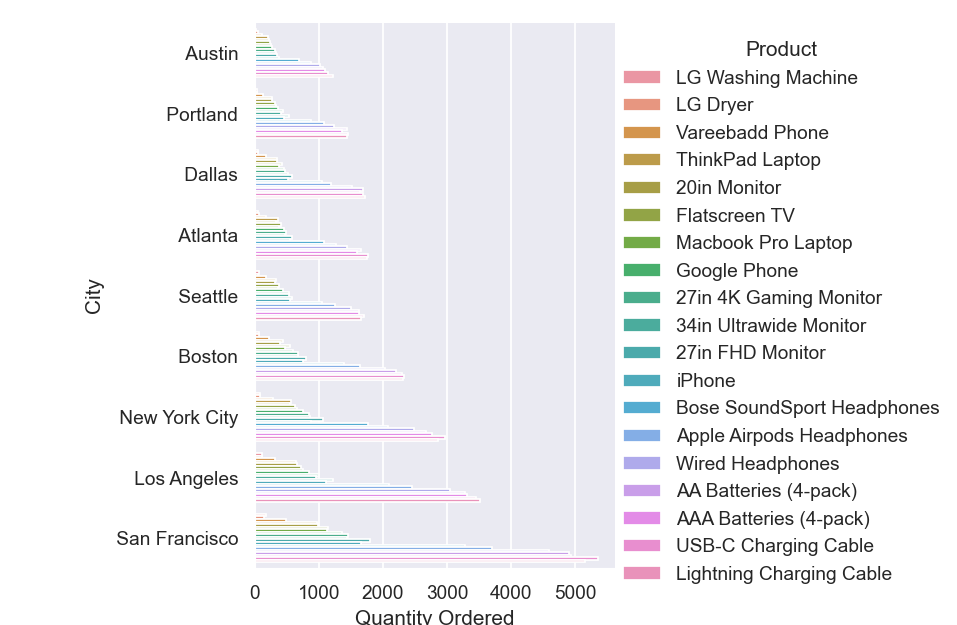

In [377]:
%matplotlib notebook
sns.catplot(y="City", x='Quantity Ordered', hue="Product", kind="bar", data=df)

Summery- from above analysis i can say that san francisco is the biggest market of all electronic gadget and appliances ,their is already trusted customer in san francisco so opening  store would be better here
and more advertisement is required in portland,austin and dallas ,because they are performing below average sales wise

# 5.Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city;

a).What products are mostly sold at different times of the day?

In [378]:
# splitting time hours in day,night,afternoon and night by creating the function and applyting it to new column
def splitting_hour(x):
    if (x > 6) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x <= 16 ):
        return 'afternoon'
    elif (x > 16) and (x <= 20):
        return'evening'
    elif (x > 20) and (x <= 23) :
        return 'night'
    elif (x > 0) and (x <= 6):
        return'late Night'

data['split hours'] = data['hour'].apply(splitting_hour)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,hour,Year,City,sale,split hours
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,1,21,2019,Boston,700.00,night
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,1,14,2019,Portland,14.95,afternoon
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,1,13,2019,San Francisco,23.98,afternoon
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,1,20,2019,Los Angeles,149.99,evening
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,1,11,2019,Austin,11.99,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019-12-11,12,20,2019,San Francisco,14.95,evening
186846,319667.0,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019-12-01,12,12,2019,Los Angeles,7.68,Morning
186847,319668.0,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019-12-09,12,6,2019,Seattle,400.00,late Night
186848,319669.0,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019-12-03,12,10,2019,Dallas,11.99,Morning


their is one more column is added in dataset as required to grt info about the time of the day and sales relation.

In [379]:
df1 =  data.groupby(['split hours','Product'],as_index = False)['Quantity Ordered'].count().sort_values(by = 'Quantity Ordered',ascending = 'True')
df1

,split hours,Product,Quantity Ordered
67,late Night,LG Dryer,25
68,late Night,LG Washing Machine,28
86,night,LG Dryer,86
87,night,LG Washing Machine,88
73,late Night,Vareebadd Phone,97
...,...,...,...
53,evening,USB-C Charging Cable,5618
4,Morning,AA Batteries (4-pack),6046
5,Morning,AAA Batteries (4-pack),6124
12,Morning,Lightning Charging Cable,6420


<IPython.core.display.Javascript object>


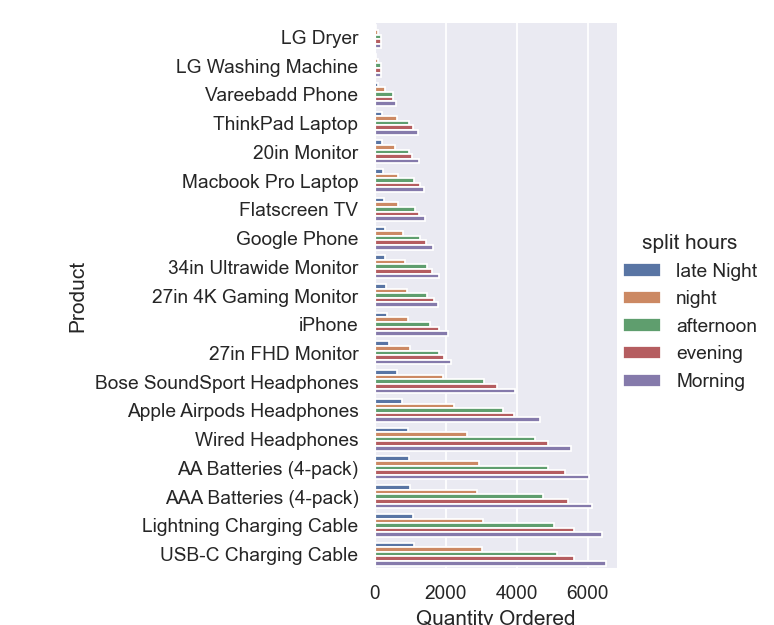

In [380]:
# graph visualisation of this data
sns.catplot(y="Product", x='Quantity Ordered', hue="split hours", kind="bar", data=df1)

In [381]:
# getting most sold product every time of day
df1.drop_duplicates(subset = 'split hours',keep = 'last')

,split hours,Product,Quantity Ordered
72,late Night,USB-C Charging Cable,1091
88,night,Lightning Charging Cable,3036
34,afternoon,USB-C Charging Cable,5127
53,evening,USB-C Charging Cable,5618
15,Morning,USB-C Charging Cable,6511


USB-C Charging Cable is most bought product earlier we have seen. also this product is bought maximum times in every part of the day.this product has low durability as compare to other products.

b).Which time of day has the most sales?

In [382]:
data.groupby('split hours')['sale'].sum().sort_values()

split hours
late Night    1.682320e+06
night         4.824827e+06
afternoon     8.078030e+06
evening       9.037683e+06
Morning       1.012913e+07
Name: sale, dtype: float64

above output is suggesting that the most sale is done in morning hours from 6 to 12 am. dataset is telling that the morning hours are peak for the bussinuess
so putting experience salesmen in this shift might inhance more bussiness.

In [383]:
# visualisation of sale in split hours
data2 = data.copy()
data2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,hour,Year,City,sale,split hours
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,1,21,2019,Boston,700.00,night
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,1,14,2019,Portland,14.95,afternoon
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,1,13,2019,San Francisco,23.98,afternoon
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,1,20,2019,Los Angeles,149.99,evening
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,1,11,2019,Austin,11.99,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019-12-11,12,20,2019,San Francisco,14.95,evening
186846,319667.0,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019-12-01,12,12,2019,Los Angeles,7.68,Morning
186847,319668.0,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019-12-09,12,6,2019,Seattle,400.00,late Night
186848,319669.0,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019-12-03,12,10,2019,Dallas,11.99,Morning


<IPython.core.display.Javascript object>


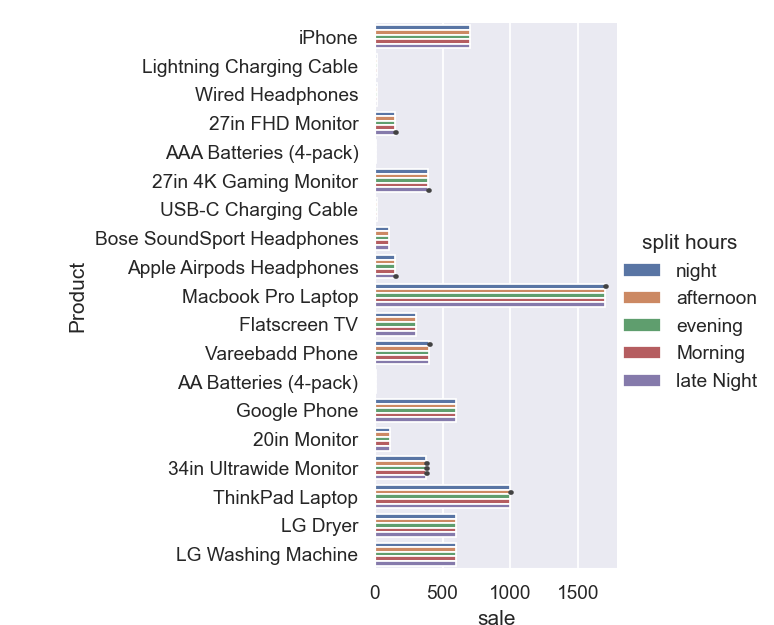

In [384]:
sns.catplot(y="Product", x='sale', hue="split hours", kind="bar", data=data2)

<IPython.core.display.Javascript object>


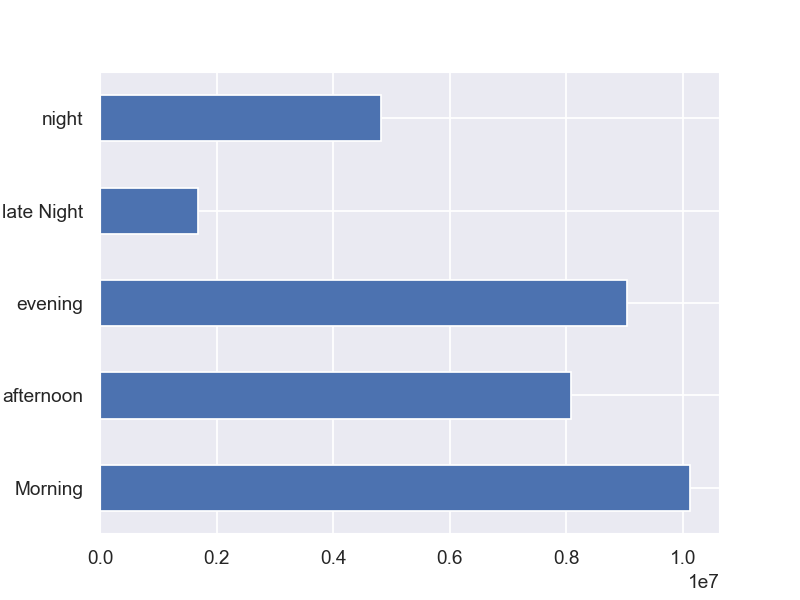

In [394]:
%matplotlib notebook
data2.groupby('split hours').sale.sum().plot.barh()
plt.show()

from the sales point of view the best working hours is 6 to 12 as we see earlier the most sale given by these hours and the product should be macbook pro laptop ,thinkpad on which focus should be put more because these are high revenue generating product that could inhance rapidily sales records. 

# 6.Find out the pair of products that are most sold together. For example, generally, we would expect a person who buys an iPhone 11 to also buy the Apple Airpods together with it. Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome.

In [390]:


data = data[data['Order ID'].duplicated(keep=False)]
data['paired product']= data2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
data = data.sort_values(by='Quantity Ordered')


In [391]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,hour,Year,City,sale,split hours,paired product
41,141275.0,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",2019-01-07,1,16,2019,Austin,11.95,afternoon,"USB-C Charging Cable,Wired Headphones"
121771,257520.0,iPhone,1.0,700.00,2019-09-07 01:39:00,"179 Wilson St, Boston, MA 02215",2019-09-07,9,1,2019,Boston,700.00,late Night,"iPhone,Apple Airpods Headphones"
121772,257520.0,Apple Airpods Headphones,1.0,150.00,2019-09-07 01:39:00,"179 Wilson St, Boston, MA 02215",2019-09-07,9,1,2019,Boston,150.00,late Night,"iPhone,Apple Airpods Headphones"
121784,257531.0,iPhone,1.0,700.00,2019-09-02 16:39:00,"524 Park St, Los Angeles, CA 90001",2019-09-02,9,16,2019,Los Angeles,700.00,afternoon,"iPhone,Lightning Charging Cable"
121785,257531.0,Lightning Charging Cable,1.0,14.95,2019-09-02 16:39:00,"524 Park St, Los Angeles, CA 90001",2019-09-02,9,16,2019,Los Angeles,14.95,afternoon,"iPhone,Lightning Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87632,224840.0,AAA Batteries (4-pack),6.0,2.99,2019-07-26 20:42:00,"304 8th St, Boston, MA 02215",2019-07-26,7,20,2019,Boston,17.94,evening,"ThinkPad Laptop,AAA Batteries (4-pack)"
101541,238157.0,AAA Batteries (4-pack),6.0,2.99,2019-08-12 19:09:00,"14 Lakeview St, San Francisco, CA 94016",2019-08-12,8,19,2019,San Francisco,17.94,evening,"USB-C Charging Cable,AAA Batteries (4-pack)"
104757,241241.0,AAA Batteries (4-pack),7.0,2.99,2019-08-01 13:05:00,"426 Wilson St, Boston, MA 02215",2019-08-01,8,13,2019,Boston,20.93,afternoon,"AAA Batteries (4-pack),20in Monitor"
154423,288689.0,AAA Batteries (4-pack),7.0,2.99,2019-11-19 21:47:00,"443 Ridge St, New York City, NY 10001",2019-11-19,11,21,2019,New York City,20.93,night,"AA Batteries (4-pack),AAA Batteries (4-pack)"


In [392]:
data = data.drop_duplicates(subset = 'Order ID',keep = 'last')
data['paired product'].value_counts().sort_values(ascending = False)

iPhone,Lightning Charging Cable                                          886
Google Phone,USB-C Charging Cable                                        857
iPhone,Wired Headphones                                                  361
Vareebadd Phone,USB-C Charging Cable                                     312
Google Phone,Wired Headphones                                            303
                                                                        ... 
iPhone,Lightning Charging Cable,Wired Headphones,USB-C Charging Cable      1
iPhone,Apple Airpods Headphones,Bose SoundSport Headphones                 1
Vareebadd Phone,Lightning Charging Cable                                   1
LG Dryer,Lightning Charging Cable                                          1
Vareebadd Phone,Wired Headphones,27in 4K Gaming Monitor                    1
Name: paired product, Length: 350, dtype: int64

we can see that most freqyuent togather bought products are iphone and lightening charging cable, and we can also see that it is a combination of phones with chord products like charging cable and headphones.it must be great for sales if there is any kind of offer on chord product for buying any costly item most preferable is phone.
